In [1]:
%config IPCompleter.greedy=True
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

# Logistic Regression

### Binary classification examples
A training example consists of input vector $x$ and output boolean $y$:  
$(\boldsymbol{x}, y) \mid \boldsymbol{x} \in \mathbb{R}^{n_x}, y \in \lbrace 0, 1 \rbrace$  

$m$ training examples:  
$
\left\lbrace
\left(\boldsymbol{x}^{(1)}, y^{(1)}\right), 
\left(\boldsymbol{x}^{(2)}, y^{(2)}\right),
\dots,
\left(\boldsymbol{x}^{(m)}, y^{(m)}\right)
\right\rbrace
$  

So the full training set $\boldsymbol{X}$ consists of $m$ vectors that are $n$ long giving a $(n×m)$ shaped matrix:  
$
\boldsymbol{X} =
\begin{bmatrix}
\mid & \mid & \mid & \mid \\
\boldsymbol{x}^{(1)} &  \boldsymbol{x}^{(2)} & \dots & \boldsymbol{x}^{(m)} \\
\mid & \mid & \mid & \mid
\end{bmatrix}
$  

The corresponding $y$ solutions form the following $(1×m)$ matrix:  
$
\boldsymbol{Y} =
\left[
y^{(1)}, y^{(2)}, \dots, y^{(m)}
\right]
$ 


### Logistic regression - a single-neuron system with sigmoid activation
for solving Binary Classification  

Looking for: $\hat{y} = P(y=1 \mid \boldsymbol{x})$  
Note: $0 \le \hat{y} \le 1$

Logistic Regression parameters: weights and bias: $\boldsymbol{w} \in \mathbb{R}^{n_x}, b \in \mathbb{R}$  
Logistic Regression output: $$\hat{y} = \sigma(\boldsymbol{w}^{\intercal}\boldsymbol{x} + b)$$

Where: sigmoid fn: $\sigma(z) = \frac{1}{1+e^{-z}}$

### Cross-Entropy Loss function ("Log Loss" = "Logistic Loss" = "Logarithmic Loss")
MSE (Mean Squared Error) $L2(y, \hat{y}) = \frac{1}{2}(\hat{y}-y)^2$ is not good because for Logistic Regression it tends to have many local minima. (It is certainly convex in relation to $y$ and $\hat{y}$, but it is **not convex** in relation to $\boldsymbol{w}$ and $b$.)  

Instead we use **Cross-Entropy Loss** which is **convex** for Logistic Regression parameters and will have one global minimum: $$L(y, \hat{y}) = -(y\log\hat{y} + (1-y)\log(1-\hat{y}))$$  
Intuition: since $y \in \lbrace0,1\rbrace$:  
- if $y=1: L(y, \hat{y}) = -\log\hat{y}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
As $\hat{y}$ gets further from true 1, $L$ gets exponentially bigger.
- if $y=0: L(y, \hat{y}) = -\log(1-\hat{y})$ &nbsp;&nbsp;&nbsp;
As $\hat{y}$ gets further from true 0, $L$ gets exponentially bigger.  

Why is it called *Cross-Entropy*?  

**Entropy** is average amount of information contained in an element of a distribution.  
Information can be regarded as deviance from ground zero. It can be measured by comparing a distribution (i.e. the prediction) to fixed outcomes. We want to measure how many times uncertainity was halved when replacing the predicted distribution with an imagined fixed outcome. This is the number of *bits* of information gained.  
E.g. take a predicted Bernoulli distribution $\hat{p}$: $\hat{p}_0 = 0.75$ and $\hat{p}_1 = 0.25$. Let's say the fixed outcome is $p_0=0$ and $p_1=1$. The uncertainity for case $\hat{p}_1$ has decreased four-fold, which is 2 bits of information. This can also be calculated as $InfoBits = -\log_2\hat{p}_1$. If $p_0$ was found true however, applying the same calculation to $\hat{p}_0$ yields 0.415 bits. Taking the weighted average of the two bit counts is the entropy of the predicted distribution before any truth is established: $0.75*0.415+0.25*2 = 0.811$ bits.  
**Entropy function:**
$$H(\hat{p}) = -\sum_i(\hat{p}_i\log_2\hat{p}_i)$$
**Cross-Entropy**, however, is the amount of information gained by learning a particular truth in relation to a predicted distribution. It depends on both the predicted distribution $\hat{p}$ and the learned truth-distribution $p$.
$$H(p,\hat{p}) = -\sum_i(p_i\log_2\hat{p}_i)$$
In the case of a Bernoulli distribution, the cross-entropy equals $-(y\log\hat{y} + (1-y)\log(1-\hat{y}))$.  
The logarithmic base doesn't really matter.

In [2]:
# Simple Cross-Entropy (for Bernoulli distribution only)
def cross_entropy_bernoulli(y, yhat, eps=1e-15):
    if(yhat==0):
        yhat += eps
    if(yhat==1):
        yhat -= eps
    return -( y*math.log2(yhat) + (1-y)*math.log2(1-yhat) )

# Vectorized Cross-Entropy
# Returns: -( y*math.log2(yhat) + (1-y)*math.log2(1-yhat) )
def v_cross_entropy_bernoulli(ys, yhats, eps=1e-15):
    yhats[yhats==0] += eps
    yhats[yhats==1] -= eps
    resultYes = ys * np.log2(yhats)
    resultNo = (1-ys) * np.log2(1-yhats)
    return - (resultYes + resultNo)    

# Pseudo-Vectorized Cross-Entropy
pseudo_v_cross_entropy_bernoulli = np.vectorize(cross_entropy_bernoulli, otypes=[np.float], cache=False)

CPU times: user 1.21 ms, sys: 10.5 ms, total: 11.8 ms
Wall time: 11.8 ms
CPU times: user 7.34 ms, sys: 0 ns, total: 7.34 ms
Wall time: 7.35 ms
CPU times: user 222 ms, sys: 152 ms, total: 375 ms
Wall time: 375 ms
CPU times: user 189 ms, sys: 29.1 ms, total: 218 ms
Wall time: 218 ms
CPU times: user 484 ms, sys: 6.41 ms, total: 491 ms
Wall time: 490 ms
CPU times: user 462 ms, sys: 39.1 ms, total: 501 ms
Wall time: 501 ms
CPU times: user 415 ms, sys: 0 ns, total: 415 ms
Wall time: 415 ms
CPU times: user 224 ms, sys: 17.5 ms, total: 241 ms
Wall time: 241 ms


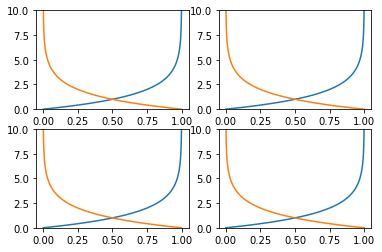

In [3]:
n = 100000
ys0 = np.zeros(n)
ys1 = np.ones(n)
yhats = np.linspace(1e-15,1-1e-15,n)

plt.close('all')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

# Vectorized
%time losses0 = v_cross_entropy_bernoulli(ys0, yhats)
%time losses1 = v_cross_entropy_bernoulli(ys1, yhats)
ax1.set_ylim(0,10)
ax1.plot(yhats, losses0)
ax1.plot(yhats, losses1)

# Pseudo-vectorized
%time losses0 = pseudo_v_cross_entropy_bernoulli(ys0, yhats)
%time losses1 = pseudo_v_cross_entropy_bernoulli(ys1, yhats)
ax2.set_ylim(0,10)
ax2.plot(yhats, losses0)
ax2.plot(yhats, losses1)

# List comprehension
%time losses0 = np.array([cross_entropy_bernoulli(ys0[i], yhats[i]) for i in range(ys0.shape[0])])
%time losses1 = np.array([cross_entropy_bernoulli(ys1[i], yhats[i]) for i in range(ys1.shape[0])])
ax3.set_ylim(0,10)
ax3.plot(yhats, losses0)
ax3.plot(yhats, losses1)

# Loop
def loop_losses(ys, yhats):
    result = np.empty_like(yhats)
    for i in range(yhats.shape[0]):
        result[i] = cross_entropy_bernoulli(ys[i], yhats[i])
    return result
%time losses0 = loop_losses(ys0, yhats)
%time losses1 = loop_losses(ys1, yhats)
ax4.set_ylim(0,10)
ax4.plot(yhats, losses0)
ax4.plot(yhats, losses1)

### Cost function (average Loss)
Given the training set $\langle\boldsymbol{X}$, $\boldsymbol{Y}\rangle$ in Logistic Regression:
$$
\begin{align}
J(\boldsymbol{w}, b) &= \frac{1}{m}\sum_{i=1}^{m}L(y_i, \hat{y}_i)\\
&= -\frac{1}{m}\sum_{i=1}^{m}\left[(y_i\log\hat{y}_i + (1-y_i)\log(1-\hat{y}_i))\right]
\end{align}
$$

### Cost derivative (slope, gradient)
Given the training set $\langle\boldsymbol{X}$, $\boldsymbol{Y}\rangle$ in Logistic Regression and a forward pass on each of the $m$ training examples giving a $\langle z_i, \hat{y}_i, L_i\rangle$  

$$
\nabla J(\boldsymbol{w},b)
=
\frac{1}{m}\sum_{i=1}^m
\begin{bmatrix}
\frac{dL_i}{dw_1}\\
\frac{dL_i}{dw_2}\\
\vdots\\
\frac{dL_i}{dw_{n_x}}\\
\frac{dL_i}{db}
\end{bmatrix}
=
\frac{1}{m}\sum_{i=1}^m
\begin{bmatrix}
\frac{dL_i}{d\hat{y}_i}\frac{d\hat{y}_i}{dz_i}\frac{dz_i}{dw_1}\\
\frac{dL_i}{d\hat{y}_i}\frac{d\hat{y}_i}{dz_i}\frac{dz_i}{dw_2}\\
\vdots\\
\frac{dL_i}{d\hat{y}_i}\frac{d\hat{y}_i}{dz_i}\frac{dz_i}{dw_{n_x}}\\
\frac{dL_i}{d\hat{y}_i}\frac{d\hat{y}_i}{dz_i}\frac{dz_i}{db}\\
\end{bmatrix}
$$  
Let error amplification at the mid-neuron be 
$
E_i = \frac{dL_i}{d\hat{y}_i}\frac{d\hat{y}_i}{dz_i}
= -\left(\frac{y_i}{\hat{y}_i}-\frac{1-y_i}{1-\hat{y}_i}\right)\frac{d\hat{y}_i}{dz_i}
= \left(\frac{1-y_i}{1-\hat{y}_i}-\frac{y_i}{\hat{y}_i}\right)\sigma'(z_i)
$  

Knowing that 
$
\sigma'(z) = \left(\frac{1}{1+e^{-z}}\right)' = \left((1+e^{-z})^{-1}\right)' = -(1+e^{-z})^{-2}(1+e^{-z})'
= \frac{e^{-z}}{(1+e^{-z})^2} = \frac{(1+e^{-z})-1}{(1+e^{-z})^2}
= \frac{1+e^{-z}}{(1+e^{-z})^2} - \frac{1}{(1+e^{-z})^2}
= \frac{1}{1+e^{-z}} - \frac{1}{(1+e^{-z})^2}
$  
Therefore $\sigma'(z) = \sigma(z) - \sigma(z)^2 = \sigma(z)(1-\sigma(z)) = \hat{y}(1-\hat{y})$  

Now 
$
E_i = \left(\frac{1-y_i}{1-\hat{y}_i}-\frac{y_i}{\hat{y}_i}\right)\hat{y}_i(1-\hat{y}_i)
= \left((1-y_i)\hat{y}_i\right) - \left(y_i(1-\hat{y}_i)\right)
= (\hat{y}_i-y_i\hat{y}_i) - (y_i-y_i\hat{y}_i)
= \hat{y}_i - y_i
$  

$$
\nabla J(\boldsymbol{w},b)
=
\frac{1}{m}\sum_{i=1}^m
\begin{bmatrix}
E_i\frac{dz_i}{dw_1}\\
E_i\frac{dz_i}{dw_2}\\
\vdots\\
E_i\frac{dz_i}{dw_{n_x}}\\
E_i\frac{dz_i}{db}
\end{bmatrix}
=
\frac{1}{m}\sum_{i=1}^m
\begin{bmatrix}
E_i x_{i_1}\\
E_i x_{i_2}\\
\vdots\\
E_i x_{i_n}\\
E_i
\end{bmatrix}
=
\frac{1}{m}\sum_{i=1}^m
\begin{bmatrix}
x_{i_1} (\hat{y}_i - y_i)\\
x_{i_2} (\hat{y}_i - y_i)\\
\vdots\\
x_{i_n} (\hat{y}_i - y_i)\\
\hat{y}_i - y_i
\end{bmatrix}
=
\frac{1}{m}\sum_{i=1}^m x_{i} (\hat{y}_i - y_i)
$$